<a href="https://colab.research.google.com/github/Raijin-ZD/HeartMachineLearning/blob/main/HeartMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name** : Ziad Mohamed Shafik



**Summary:**

In this assignment, we aim to explore the performance of two popular ensemble learning models, AdaBoost and Random Forest, along with a combination of both, on two distinct datasets: the Heart Disease Classification Dataset and the Thyroid Disease Data. Our objective is to preprocess the data, implement the ensemble models, fine-tune their hyperparameters using grid search, and evaluate their performance using various metrics such as accuracy, precision, recall, and F1-score. Additionally, we will create visualizations for comparison and draw insights from the results.

**Objective:**

The primary objective of this project is to utilize ensemble learning methods, specifically AdaBoost and Random Forest, to predict the target variable in each dataset. We will leverage grid search to optimize the hyperparameters of these models for improved performance. Additionally, we aim to conduct exploratory data analysis (EDA) on the datasets to gain insights into their characteristics and distributions.

**Steps to be undertaken:**

1. **Data Collection:** Download the Heart Disease Classification Dataset and the Thyroid Disease Data from Kaggle.

2. **Exploratory Data Analysis (EDA):** Perform exploratory data analysis on both datasets to understand their structure, distributions, and relationships between variables.

3. **Data Preprocessing:** Preprocess the datasets by handling missing values, encoding categorical variables, scaling numerical features, and any other necessary data cleaning procedures. We will ensure that the data is in a suitable format for training the models.

4. **Model Implementation:** Implement AdaBoost and Random Forest models using Python with scikit-learn. Additionally, we will experiment with combining AdaBoost with Random Forest and evaluate its performance.

5. **Hyperparameter Tuning:** Fine-tune the hyperparameters of each model using techniques such as grid search to optimize their performance on each dataset.

6. **Training and Evaluation:** Train the tuned models on the respective datasets and evaluate their performance using appropriate evaluation metrics such as accuracy, precision, recall, and F1-score.

7. **Comparison Table:** Create a table summarizing the accuracy of each ensemble model on each dataset for easy comparison.

8. **Visualization:** Generate visualizations, including accuracy comparison bar charts, to provide a clear comparison of the ensemble models' performance on different datasets.

9. **Insights and Conclusions:** Analyze the results obtained, discuss the strengths and weaknesses of each ensemble model, and draw conclusions regarding their performance on different types of datasets and hyperparameters.

Let's proceed with the implementation steps outlined above in Google Colab. We will start by importing necessary libraries and loading the datasets for further analysis and preprocessing.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dfHeart = pd.read_csv("/content/Heart Attack.csv")
dfThyroid = pd.read_csv("/content/thyroidDF.csv")


# **DATA PREPROCESSING**

In [ ]:
dfThyroid.info()
print(len(dfThyroid)) #prints rows
print(len(dfThyroid.columns))#prints cols
#9172 row,31 cols

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

In [ ]:
dfHeart.info()
print(len(dfHeart)) #prints rows
print(len(dfHeart.columns))#prints cols
#1319 row,9 cols

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB
1319
9


dfHeart, dfThyroid

**Checking for null values**



In [ ]:
dfThyroid.isnull().sum()

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
referral_source           0
target                    0
patient_id                0
dtype: int64

**dfHeart Has no null values but we will check if the data valid or not**

In [ ]:
dfHeart.isnull().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

In [ ]:
(dfHeart.isna().sum() / dfHeart.shape[0]) * 100

age              0.0
gender           0.0
impluse          0.0
pressurehight    0.0
pressurelow      0.0
glucose          0.0
kcm              0.0
troponin         0.0
class            0.0
dtype: float64

In [ ]:
(dfThyroid.isna().sum() / dfThyroid.shape[0]) * 100

age                     0.000000
sex                     3.347143
on_thyroxine            0.000000
query_on_thyroxine      0.000000
on_antithyroid_meds     0.000000
sick                    0.000000
pregnant                0.000000
thyroid_surgery         0.000000
I131_treatment          0.000000
query_hypothyroid       0.000000
query_hyperthyroid      0.000000
lithium                 0.000000
goitre                  0.000000
tumor                   0.000000
hypopituitary           0.000000
psych                   0.000000
TSH_measured            0.000000
TSH                     9.180113
T3_measured             0.000000
T3                     28.390754
TT4_measured            0.000000
TT4                     4.819014
T4U_measured            0.000000
T4U                     8.820323
FTI_measured            0.000000
FTI                     8.744003
TBG_measured            0.000000
TBG                    96.194941
referral_source         0.000000
target                  0.000000
patient_id

In [ ]:
dfHeart.columns

Index(['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose',
       'kcm', 'troponin', 'class'],
      dtype='object')

**Seeing if there is invalid data in the data sets**

In [ ]:
dfHeart.age.unique()

array([ 64,  21,  55,  58,  32,  63,  44,  67,  54,  47,  61,  86,  45,
        37,  60,  48,  52,  30,  50,  72,  42,  35,  68,  56,  65,  34,
        40,  46,  38,  57,  28,  49,  29,  80,  90,  62,  53,  75,  66,
        19,  77,  71,  43,  51,  59,  20,  36,  70,  78,  69,  73,  41,
        82,  25,  26,  76,  33,  39,  91,  31,  74,  22,  79,  81,  27,
        83,  24,  85,  88, 100,  23,  14,  87, 103,  84])

In [ ]:
dfHeart.gender.unique()

array([1, 0])

In [ ]:
dfHeart.impluse.unique()

array([  66,   94,   64,   70,   61,   40,   60,   76,   81,   73,   72,
         92,  135,   63,   65,  125,   62,   58,   93,   96,   95,   97,
         91,   87,   77,   80,   82,   83,   78,   90,   59,   57,   98,
       1111,  102,  103,  105,   74,   85,   75,   71,   68,   67,   56,
         89,   88,   86,   79,  100,   69,   84,  110,  120,  122,  119,
        116,  114,   55,   53,   54,  117,  112,  108,  134,  111,  101,
        113,   51,   52,   99,  132,   50,  107,  104,   49,   46,   20,
         36,   45])

In [ ]:
dfHeart.pressurehight.unique()

array([160,  98, 120, 112, 179, 214, 154, 166, 150, 199, 122, 118, 114,
       100, 107, 109, 151, 110, 104, 106, 152, 134, 135, 131, 137, 121,
       145, 136, 156, 155, 105,  91, 101, 111, 115, 133, 153, 125, 130,
       127, 140, 141, 128, 123,  94,  95, 117, 124, 119, 138, 157, 202,
       175, 144, 129,  97, 116, 113, 148, 164, 192, 171, 108, 132,  85,
        89,  87,  99,  96,  86,  70,  71,  78, 126, 170, 169, 149, 168,
       191, 193, 167, 165, 146,  93, 180,  42, 220, 147, 142, 102, 103,
       143, 139, 178,  80,  84,  83,  65, 208,  76,  90,  92, 183,  88,
       158, 161, 176, 159, 198, 204, 200, 162, 177, 223,  67, 209])

In [ ]:
dfHeart.pressurelow.unique()

array([ 83,  46,  77,  55,  65,  58,  68,  82,  81,  95,  90,  99,  67,
        70,  66,  86,  78,  60,  85,  63,  57,  61,  49,  62,  76,  75,
        71,  52,  80,  74,  73,  69,  94,  88,  64,  59,  93,  54,  56,
        44,  72,  89,  51,  50,  79,  47,  92, 103,  97, 110,  84, 104,
       100,  42, 128, 107,  91,  98,  38,  53,  48,  87, 106,  41,  40,
       105, 102, 118, 109,  43,  45,  96, 154])

In [ ]:
dfHeart.glucose.unique()

array([160. , 296. , 270. , 300. ,  87. , 102. , 135. , 100. , 198. ,
        92. ,  97. , 319. , 134. ,  96. , 274. ,  89. , 301. , 227. ,
       107. , 269. , 111. , 101. ,  95. , 279. , 166. , 321. ,  98. ,
       105. , 136. ,  82. , 117. , 120. , 208. , 125. , 103. ,  93. ,
        99. , 228. , 238. , 133. , 113. ,  91. , 114. , 149. , 110. ,
       251. , 191. , 334. , 109. , 201. , 167. ,  85. , 112. , 123. ,
        86. , 177. ,  90. , 115. , 392. , 147. , 141. , 222. , 174. ,
       162. , 219. , 189. , 193. , 181. , 387. , 121. , 294. , 116. ,
        88. , 240. , 132. , 159. ,  81. , 266. , 142. , 244. , 130. ,
       182. ,  94. ,  83. , 241. , 318. ,  66. , 156. , 108. , 322. ,
       187. , 122. , 362. , 180. , 127. , 131. ,  84. , 137. , 242. ,
       106. , 197. , 152. , 169. , 347. , 104. , 165. , 126. , 215. ,
        61. ,  80. , 195. , 150. , 194. , 233. , 462. , 422. , 245. ,
       168. , 188. , 129. , 200. , 146. , 140. , 382. , 217. , 303. ,
       154. , 221. ,

In [ ]:
dfHeart.kcm.unique()

array([  1.8  ,   6.75 ,   1.99 ,  13.87 ,   1.08 ,   1.83 ,   0.71 ,
       300.   ,   2.35 ,   2.84 ,   2.39 ,   3.43 ,   1.42 ,   2.57 ,
         1.49 ,   1.11 ,   0.606,   2.89 ,   1.6  ,  94.79 ,   0.665,
        50.46 ,  38.72 ,   2.11 ,   2.93 ,   1.61 ,   0.493,   1.31 ,
         4.58 ,   6.48 ,   0.929,   1.37 ,   6.78 ,   4.24 ,   1.3  ,
         0.609,  15.23 ,   1.54 ,  16.95 ,   2.97 ,   4.22 ,   1.29 ,
         4.8  ,   1.33 ,   1.19 ,   0.78 ,   2.28 ,   4.39 ,  19.47 ,
         2.41 ,   3.18 ,  36.24 ,   2.21 ,   2.19 ,   5.33 ,   5.22 ,
         1.63 ,   1.24 ,   5.8  ,   3.29 ,   0.937,   4.45 ,   4.02 ,
        18.15 ,   0.865,   3.3  ,   0.718,   3.45 ,   7.65 ,   4.3  ,
         0.994,   1.53 ,  31.97 ,   2.91 ,   3.2  ,   9.35 ,  12.02 ,
         4.66 ,   4.18 ,   5.81 ,   0.633,   2.69 ,   1.06 ,   4.82 ,
         2.13 ,   2.85 ,   6.91 ,   1.98 ,  19.5  ,   0.468, 165.1  ,
         1.64 ,   1.87 ,   1.69 ,   3.27 ,   3.75 ,   1.51 ,   2.16 ,
         5.27 ,   1.

In [ ]:
dfHeart.troponin.unique()

array([1.20e-02, 1.06e+00, 3.00e-03, 1.22e-01, 4.00e-03, 2.37e+00,
       1.10e-02, 6.00e-03, 1.30e-02, 5.37e+00, 1.70e-02, 7.76e-01,
       2.00e-02, 5.00e-03, 4.91e-01, 6.12e-01, 1.39e+00, 7.00e-03,
       1.00e+01, 8.30e+00, 2.10e-02, 1.15e+00, 1.46e-01, 8.00e-03,
       2.60e-02, 5.30e-02, 9.00e-03, 6.70e-02, 4.00e-02, 1.00e-02,
       3.10e-02, 1.50e-02, 7.60e-02, 5.20e-02, 1.01e+00, 8.90e-02,
       2.80e-02, 7.03e-01, 8.50e-02, 2.19e-01, 8.64e-01, 1.05e-01,
       4.80e-02, 8.88e-01, 1.60e-02, 1.07e+00, 2.20e-02, 6.05e+00,
       7.10e-02, 1.03e-01, 2.30e-02, 3.80e-02, 5.10e-02, 2.90e-02,
       1.40e-02, 2.23e+00, 1.55e+00, 1.84e+00, 6.40e-01, 7.67e+00,
       6.10e-02, 9.40e-02, 2.70e-02, 5.40e-02, 2.52e-01, 1.79e+00,
       1.95e+00, 3.92e-01, 3.27e-01, 4.60e-02, 1.24e+00, 1.78e-01,
       1.90e-02, 1.97e+00, 6.81e-01, 1.06e-01, 1.46e+00, 6.30e-02,
       1.23e+00, 2.86e+00, 1.64e-01, 1.86e+00, 3.20e-02, 2.40e-02,
       2.50e-02, 1.42e-01, 2.99e+00, 1.00e-03, 1.71e-01, 2.80e

In [ ]:
dfThyroid.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'target', 'patient_id'],
      dtype='object')

As the columns for dfThyroid is 31 columns i checked them by myself but i removed them from code as they are all the same i left the unique ones that are not (True , False)

In [ ]:
#Outliers exist will handle later
dfThyroid.age.unique()

array([   29,    41,    36,    32,    60,    77,    28,    54,    42,
          51,    37,    16,    43,    63,    40,    75,    56,    85,
          71,    67,    55,    61,    46,    44,    82,    64,    70,
          33,    59,    53,    52,    49,    35,    48,    27,    69,
          76,    73,    68,    66,    30,    88,    38,    58,    21,
          45,    83,    62,    25,    86,    72,    14,    15,    39,
          26,    20,    80,    90,    23,    18,    13,    78,    24,
          81,    92,    57,    74,     9,    47,    17,    11,    50,
          34,     8,    79,    31,    65,    84,    12,    10,    19,
          22,     1,     2,    97,     6,    89,    87,   455,    93,
           7,    91,     5,    94,     4, 65511,    95, 65512,     3,
       65526])

In [ ]:
#valid will handle null later
dfThyroid.sex.unique()

array(['F', 'M', nan], dtype=object)

In [ ]:
dfThyroid.target.unique()

array(['-', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C|I', 'O', 'LJ', 'H|K', 'D', 'GK', 'MI', 'P',
       'FK', 'B', 'GI', 'C', 'GKJ', 'OI', 'D|R', 'E'], dtype=object)

In [ ]:
dfThyroid.referral_source.unique()

array(['other', 'SVI', 'SVHC', 'STMW', 'SVHD', 'WEST'], dtype=object)

In [ ]:
dfThyroid.patient_id.unique()

array([840801013, 840801014, 840801042, ..., 870119025, 870119027,
       870119035])

checking dublicates

In [ ]:
dfHeart.duplicated().sum()


0

In [ ]:
dfThyroid.duplicated().sum()


0

In [ ]:
dfThyroid=dfThyroid.drop_duplicates()


*Feature Cleaning*

In [ ]:
dfThyroid.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured'
,'referral_source','patient_id'],axis=1 ,inplace=True)

**Handling Outliers For the Heart Attack dataframe**

<Axes: >

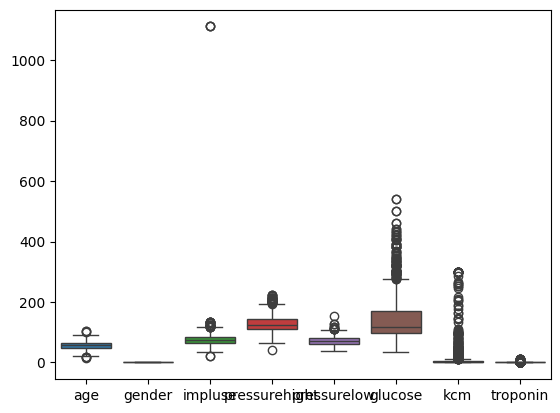

In [ ]:
sns.boxplot(dfHeart)

<Axes: >

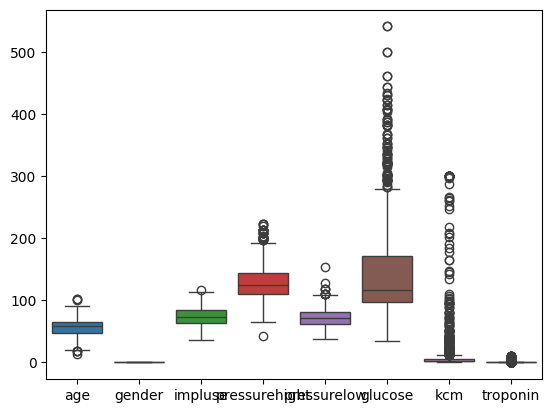

In [ ]:
Q1 = dfHeart["impluse"].quantile(0.25)
Q3 = dfHeart["impluse"].quantile(0.75)
IQR = Q3 - Q1

outliers = (dfHeart["impluse"] < Q1 - 1.5 * IQR) | (dfHeart["impluse"] > Q3 + 1.5 * IQR)
dfHeart = dfHeart[~outliers]
sns.boxplot(dfHeart)

<Axes: >

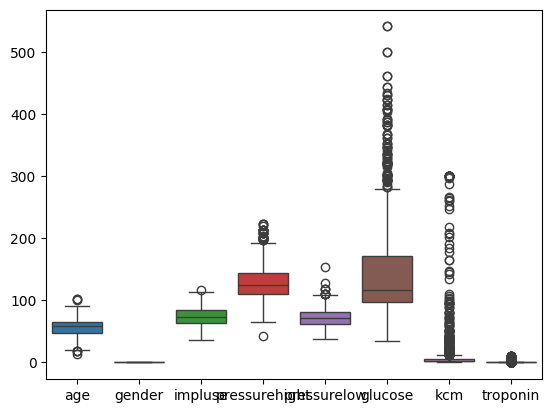

In [ ]:
sns.boxplot(dfHeart)

<Axes: ylabel='kcm'>

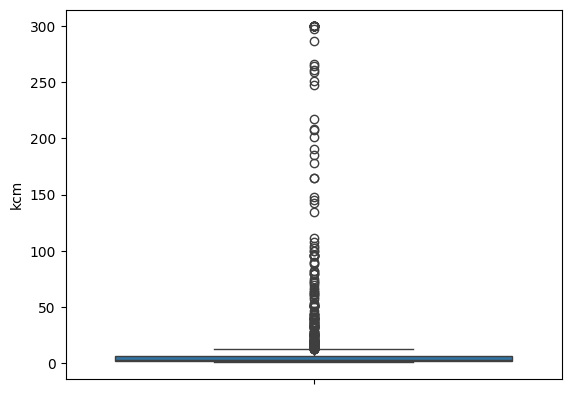

In [ ]:
sns.boxplot(dfHeart['kcm'])

In [ ]:
Q1 = dfHeart["kcm"].quantile(0.25)
Q3 = dfHeart["kcm"].quantile(0.75)
IQR = Q3 - Q1

outliers = (dfHeart["kcm"] < Q1 - 1.5 * IQR) | (dfHeart["kcm"] > Q3 + 1.5 * IQR)
dfHeart = dfHeart[~outliers]


<Axes: ylabel='kcm'>

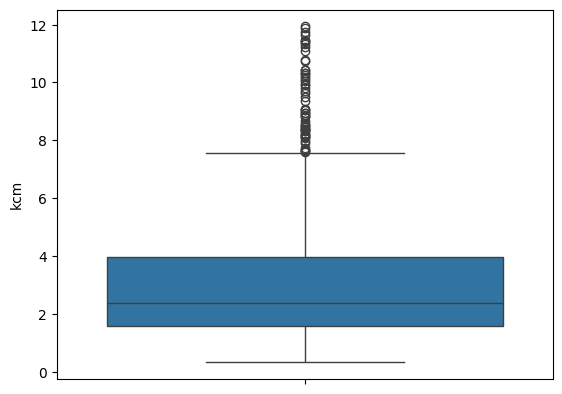

In [ ]:
sns.boxplot(dfHeart['kcm'])

<Axes: ylabel='troponin'>

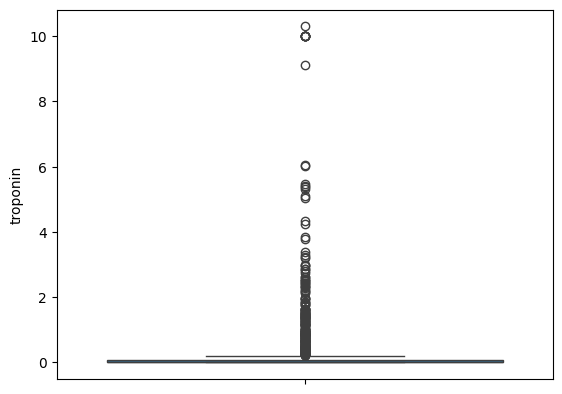

In [ ]:
sns.boxplot(dfHeart['troponin'])

In [ ]:
Q1 = dfHeart["troponin"].quantile(0.25)
Q3 = dfHeart["troponin"].quantile(0.75)
IQR = Q3 - Q1

outliers = (dfHeart["troponin"] < Q1 - 1.5 * IQR) | (dfHeart["troponin"] > Q3 + 1.5 * IQR)
dfHeart = dfHeart[~outliers]


<Axes: ylabel='troponin'>

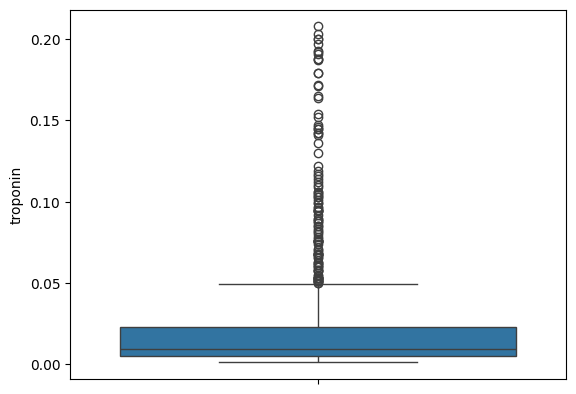

In [ ]:
sns.boxplot(dfHeart['troponin'])

Using Domain knowledge the number of these columns can not be higher or lower than this as numbers below/higher than the below is an outlier

In [ ]:
dfHeart = dfHeart[dfHeart['age'] < 100]
dfHeart = dfHeart[(dfHeart['impluse'] >= 45) & (dfHeart['impluse'] <= 135)]
dfHeart = dfHeart[(dfHeart['pressurehight'] >= 100) & (dfHeart['pressurehight'] <= 200)]
dfHeart = dfHeart[(dfHeart['pressurelow'] >= 55) & (dfHeart['pressurelow'] <= 90)]


<Axes: >

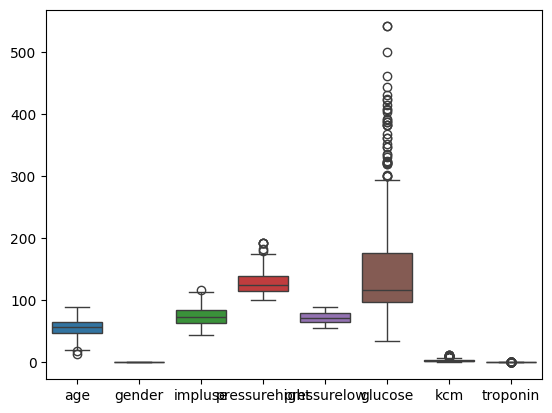

In [ ]:
sns.boxplot(dfHeart)

**Handeling Outliers For the Thyroid DataFrame**

In [ ]:
dfThyroid.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'TBG', 'target'],
      dtype='object')

<Axes: >

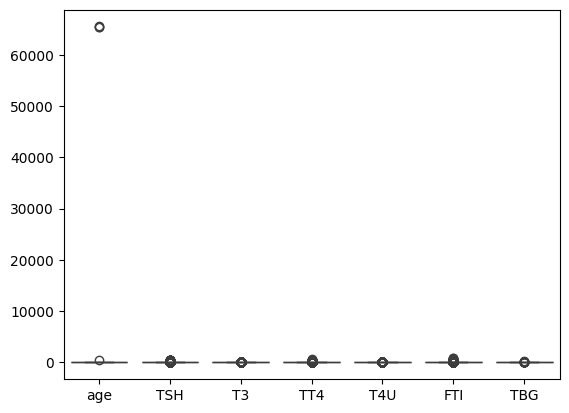

In [ ]:
sns.boxplot(dfThyroid)

<Axes: ylabel='TSH'>

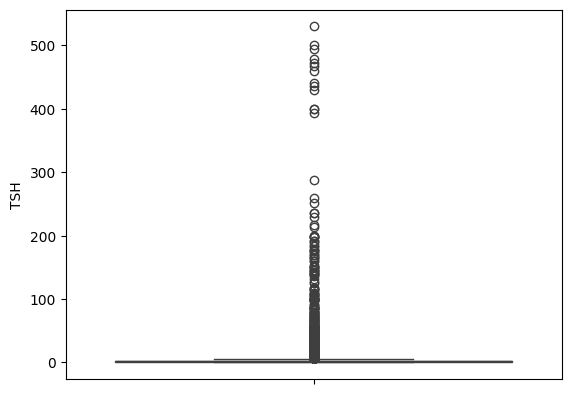

In [ ]:
sns.boxplot(dfThyroid['TSH'])

In [ ]:
Q1 = dfThyroid["TSH"].quantile(0.25)
Q3 = dfThyroid["TSH"].quantile(0.75)
IQR = Q3 - Q1

outliers = (dfThyroid["TSH"] < Q1 - 1.5 * IQR) | (dfThyroid["TSH"] > Q3 + 1.5 * IQR)
dfThyroid = dfThyroid[~outliers]


<Axes: ylabel='TSH'>

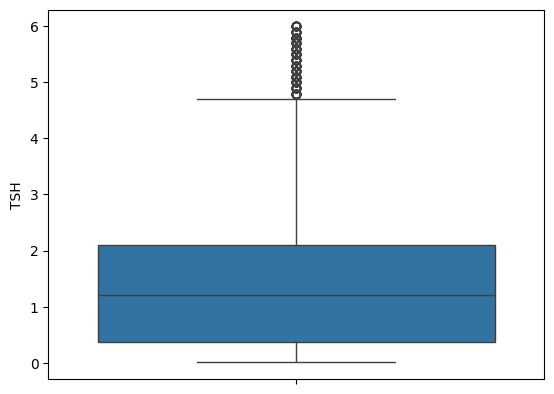

In [ ]:
sns.boxplot(dfThyroid['TSH'])

<Axes: ylabel='T3'>

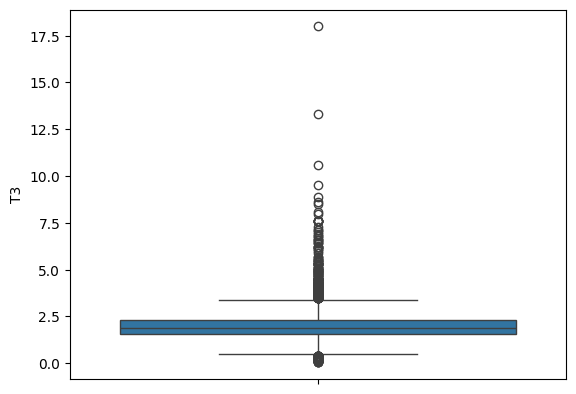

In [ ]:
sns.boxplot(dfThyroid['T3'])

In [ ]:
Q1 = dfThyroid["T3"].quantile(0.25)
Q3 = dfThyroid["T3"].quantile(0.75)
IQR = Q3 - Q1

outliers = (dfThyroid["T3"] < Q1 - 1.5 * IQR) | (dfThyroid["T3"] > Q3 + 1.5 * IQR)
dfThyroid = dfThyroid[~outliers]


<Axes: ylabel='T3'>

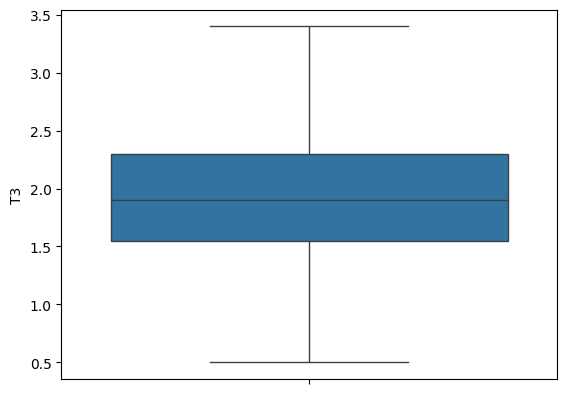

In [ ]:
sns.boxplot(dfThyroid['T3'])

<Axes: ylabel='TT4'>

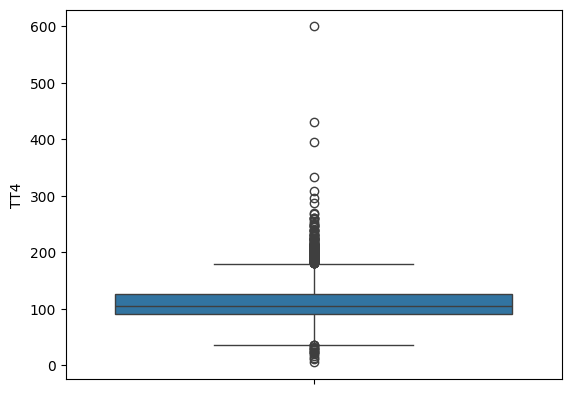

In [ ]:
sns.boxplot(dfThyroid['TT4'])

In [ ]:
Q1 = dfThyroid["TT4"].quantile(0.25)
Q3 = dfThyroid["TT4"].quantile(0.75)
IQR = Q3 - Q1

outliers = (dfThyroid["TT4"] < Q1 - 1.5 * IQR) | (dfThyroid["TT4"] > Q3 + 1.5 * IQR)
dfThyroid = dfThyroid[~outliers]


<Axes: ylabel='TT4'>

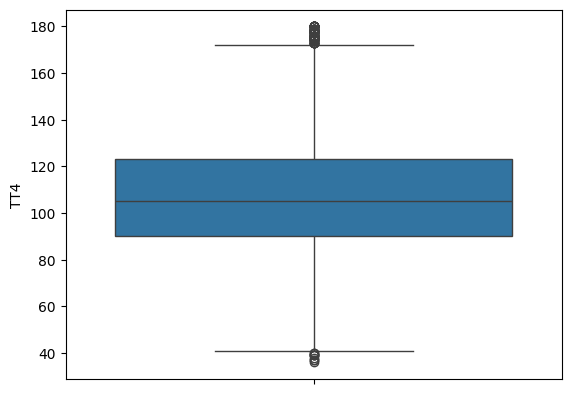

In [ ]:
sns.boxplot(dfThyroid['TT4'])

<Axes: ylabel='T4U'>

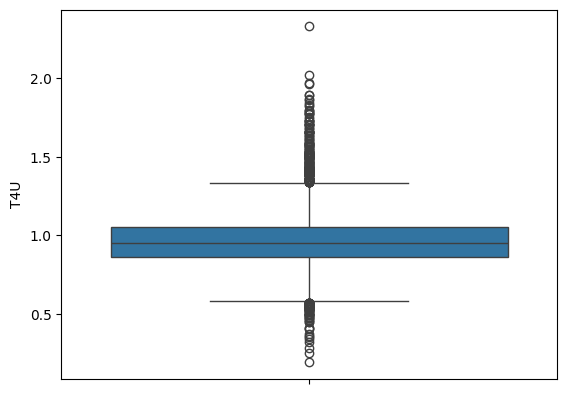

In [ ]:
sns.boxplot(dfThyroid['T4U'])

In [ ]:
Q1 = dfThyroid["T4U"].quantile(0.25)
Q3 = dfThyroid["T4U"].quantile(0.75)
IQR = Q3 - Q1

outliers = (dfThyroid["T4U"] < Q1 - 1.5 * IQR) | (dfThyroid["T4U"] > Q3 + 1.5 * IQR)
dfThyroid = dfThyroid[~outliers]


<Axes: ylabel='T4U'>

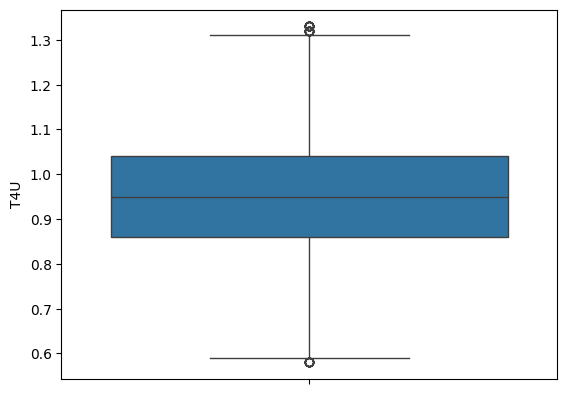

In [ ]:
sns.boxplot(dfThyroid['T4U'])

<Axes: ylabel='FTI'>

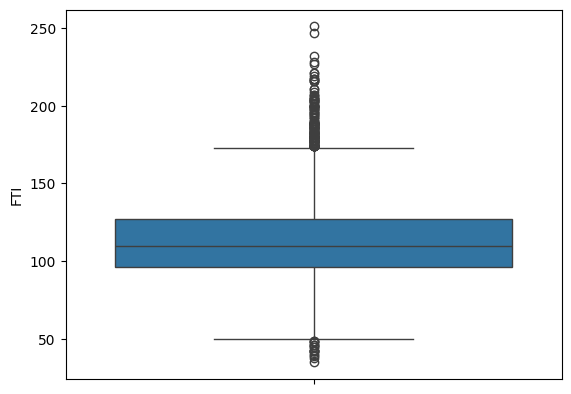

In [ ]:
sns.boxplot(dfThyroid['FTI'])

In [ ]:
Q1 = dfThyroid["FTI"].quantile(0.25)
Q3 = dfThyroid["FTI"].quantile(0.75)
IQR = Q3 - Q1

outliers = (dfThyroid["FTI"] < Q1 - 1.5 * IQR) | (dfThyroid["FTI"] > Q3 + 1.5 * IQR)
dfThyroid = dfThyroid[~outliers]


<Axes: ylabel='FTI'>

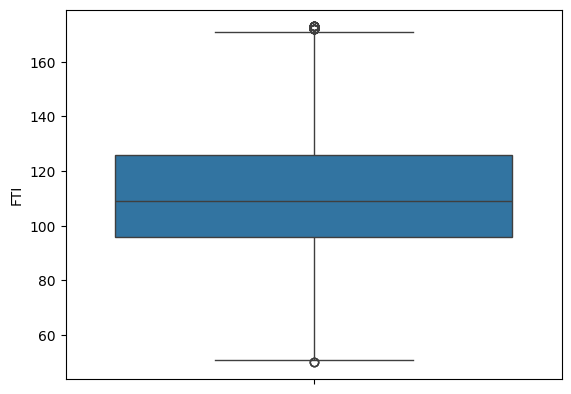

In [ ]:
sns.boxplot(dfThyroid['FTI'])

In [ ]:
dfThyroid = dfThyroid[dfThyroid['age'] < 100]


<Axes: >

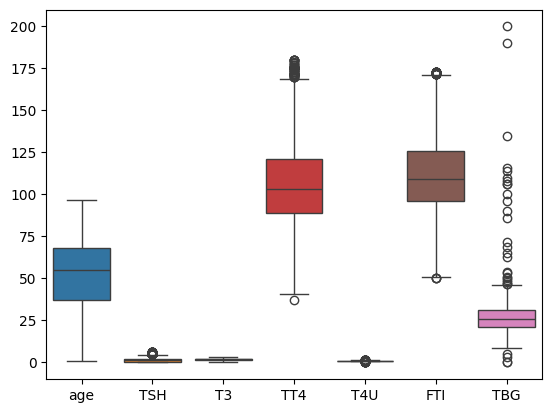

In [ ]:
sns.boxplot(dfThyroid)

handling missing values in dfThyroid

As 96.3% of it is null i will drop this column

In [ ]:
dfThyroid = dfThyroid.drop('TBG', axis=1)


In [ ]:
dfThyroid.isnull().sum()

age                       0
sex                     220
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH                     773
T3                     2114
TT4                     425
T4U                     729
FTI                     723
target                    0
dtype: int64

In [ ]:
dfThyroid.sex.value_counts()

sex
F    4632
M    2422
Name: count, dtype: int64

instead of replacing missing values for the sex column using mode i will replace them to maintain the same ratio as the original numbers

6064 / 9162 ≈ 0.662

2792 / 9162 ≈ 0.304



*   Female: 306 * 0.662≈ 203

*   Male: 306 * 0.304 ≈ 94

These values maintain the same ratio as the original numbers.

In [ ]:
dfThyroid['sex'].fillna('F', limit=212, inplace=True)

# Replace 1924 null values with 'female'
dfThyroid['sex'].fillna('M', limit=94, inplace=True)

dfThyroid['sex'].value_counts()


sex
F    4844
M    2430
Name: count, dtype: int64

In [ ]:
dfThyroid['TSH'].fillna(dfThyroid['TSH'].mean(), inplace=True)
dfThyroid['TT4'].fillna(dfThyroid['TT4'].mean(), inplace=True)
dfThyroid['T4U'].fillna(dfThyroid['T4U'].mean(), inplace=True)
dfThyroid['FTI'].fillna(dfThyroid['FTI'].mean(), inplace=True)
dfThyroid['T3'].fillna(dfThyroid['T3'].mean(), inplace=True)


In [ ]:
dfThyroid.target.unique()

array(['-', 'S', 'N', 'I', 'K', 'R', 'L', 'H|K', 'C|I', 'A', 'P', 'B',
       'J', 'AK', 'M', 'C', 'Q', 'O'], dtype=object)

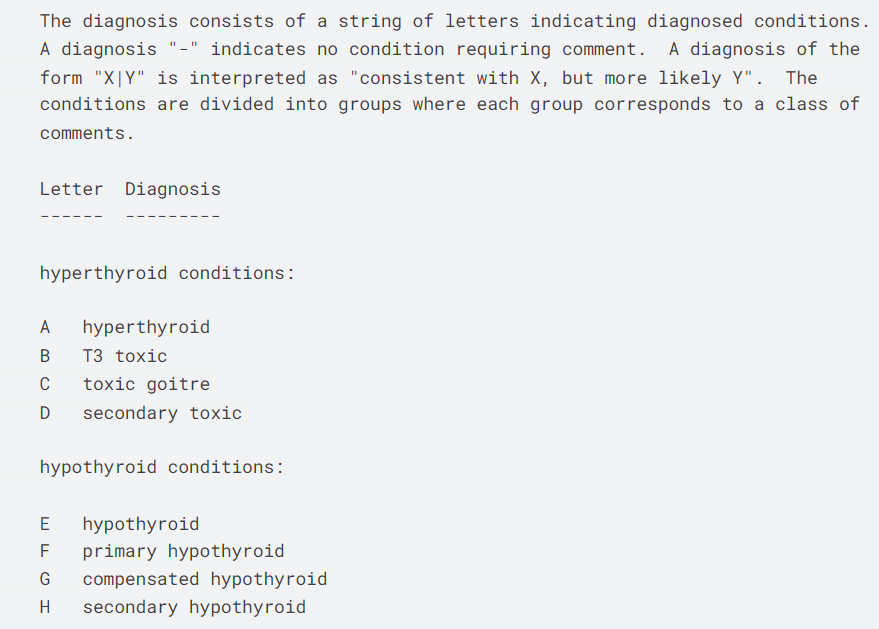

**Normalizing the data for both the data sets**

In [ ]:
selected_columns = ['age', 'T3', 'TT4', 'TSH', 'FTI']

min_max_scaler = MinMaxScaler()
df_selected_scaled = min_max_scaler.fit_transform(dfThyroid[selected_columns])

# Assign the transformed data back to the original DataFrame columns
dfThyroid[selected_columns] = df_selected_scaled

dfThyroid.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,target
0,0.291667,F,f,f,f,f,f,f,f,t,...,f,f,f,f,0.049208,0.482136,0.479849,0.952841,0.500596,-
1,0.291667,F,f,f,f,f,f,f,f,f,...,f,f,f,f,0.266055,0.482759,0.636364,0.952841,0.500596,-
2,0.416667,F,f,f,f,f,f,f,f,f,...,f,f,f,f,0.257920,0.482136,0.479849,0.952841,0.500596,-
3,0.364583,F,f,f,f,f,f,f,f,f,...,f,f,f,f,0.257920,0.482136,0.479849,0.952841,0.500596,-
4,0.322917,F,f,f,f,f,f,f,f,f,...,f,f,f,f,0.257920,0.482136,0.479849,0.952841,0.500596,S


In [ ]:
dfThyroid.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,target
0,0.291667,F,f,f,f,f,f,f,f,t,...,f,f,f,f,0.049208,0.482136,0.479849,0.952841,0.500596,-
1,0.291667,F,f,f,f,f,f,f,f,f,...,f,f,f,f,0.266055,0.482759,0.636364,0.952841,0.500596,-
2,0.416667,F,f,f,f,f,f,f,f,f,...,f,f,f,f,0.257920,0.482136,0.479849,0.952841,0.500596,-
3,0.364583,F,f,f,f,f,f,f,f,f,...,f,f,f,f,0.257920,0.482136,0.479849,0.952841,0.500596,-
4,0.322917,F,f,f,f,f,f,f,f,f,...,f,f,f,f,0.257920,0.482136,0.479849,0.952841,0.500596,S


In [ ]:
columns = dfHeart.drop("class", axis = 1).columns

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
dfHeart[columns] = min_max_scaler.fit_transform(dfHeart[columns])
dfHeart.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,0.657895,1.0,0.295775,0.645161,0.800000,0.247036,0.127292,0.053140,negative
2,0.539474,1.0,0.267606,0.645161,0.628571,0.464427,0.143644,0.009662,negative
4,0.539474,1.0,0.267606,0.129032,0.285714,0.523715,0.065324,0.009662,negative
5,0.578947,0.0,0.225352,0.129032,0.085714,0.102767,0.129873,0.014493,negative
8,0.394737,0.0,0.211268,0.580645,0.742857,0.197628,0.174628,0.014493,negative


**According to this MetaData provided in kaggle Datacard i will remap the values of target then will encode it when needed for our model later on**

In [ ]:
mapping = {'-':"Negative",
           'A':'Hyperthyroid','AK':"Hyperthyroid",'B':"Hyperthyroid", 'C':"Hyperthyroid", 'C|I': 'Hyperthyroid', 'D':"Hyperthyroid", 'D|R':"Hyperthyroid",
           'E': "Hypothyroid", 'F': "Hypothyroid", 'FK': "Hypothyroid", "G": "Hypothyroid", "GK": "Hypothyroid", "GI": "Hypothyroid", 'GKJ': 'Hypothyroid', 'H|K': 'Hypothyroid',
          }
default_category = "Unknown"

dfThyroid['target'] = dfThyroid['target'].apply(lambda x: mapping.get(x, default_category))


In [ ]:
dfThyroid["target"].value_counts()

target
Negative        6452
Unknown          784
Hyperthyroid      34
Hypothyroid        4
Name: count, dtype: int64

In [ ]:
dfHeart["class"].value_counts()

class
negative    368
positive    275
Name: count, dtype: int64

In [ ]:
dfThyroid.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'target'],
      dtype='object')

In [ ]:
dfThyroid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7274 entries, 0 to 9171
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  7274 non-null   float64
 1   sex                  7274 non-null   object 
 2   on_thyroxine         7274 non-null   object 
 3   query_on_thyroxine   7274 non-null   object 
 4   on_antithyroid_meds  7274 non-null   object 
 5   sick                 7274 non-null   object 
 6   pregnant             7274 non-null   object 
 7   thyroid_surgery      7274 non-null   object 
 8   I131_treatment       7274 non-null   object 
 9   query_hypothyroid    7274 non-null   object 
 10  query_hyperthyroid   7274 non-null   object 
 11  lithium              7274 non-null   object 
 12  goitre               7274 non-null   object 
 13  tumor                7274 non-null   object 
 14  hypopituitary        7274 non-null   object 
 15  psych                7274 non-null   object

In [ ]:
columns

Index(['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose',
       'kcm', 'troponin'],
      dtype='object')

In [ ]:
dfHeart.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,0.657895,1.0,0.295775,0.645161,0.800000,0.247036,0.127292,0.053140,negative
2,0.539474,1.0,0.267606,0.645161,0.628571,0.464427,0.143644,0.009662,negative
4,0.539474,1.0,0.267606,0.129032,0.285714,0.523715,0.065324,0.009662,negative
5,0.578947,0.0,0.225352,0.129032,0.085714,0.102767,0.129873,0.014493,negative
8,0.394737,0.0,0.211268,0.580645,0.742857,0.197628,0.174628,0.014493,negative


In [ ]:
dfThyroid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7274 entries, 0 to 9171
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  7274 non-null   float64
 1   sex                  7274 non-null   object 
 2   on_thyroxine         7274 non-null   object 
 3   query_on_thyroxine   7274 non-null   object 
 4   on_antithyroid_meds  7274 non-null   object 
 5   sick                 7274 non-null   object 
 6   pregnant             7274 non-null   object 
 7   thyroid_surgery      7274 non-null   object 
 8   I131_treatment       7274 non-null   object 
 9   query_hypothyroid    7274 non-null   object 
 10  query_hyperthyroid   7274 non-null   object 
 11  lithium              7274 non-null   object 
 12  goitre               7274 non-null   object 
 13  tumor                7274 non-null   object 
 14  hypopituitary        7274 non-null   object 
 15  psych                7274 non-null   object

**Encoding the data class and target to be usable in the models  **

In [ ]:
cat_cols = dfThyroid.select_dtypes(include=['object']).columns
cat_cols

Index(['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds',
       'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment',
       'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor',
       'hypopituitary', 'psych', 'target'],
      dtype='object')

In [ ]:
label_encoder = LabelEncoder()
for col in cat_cols:
    label_encoder.fit(dfThyroid[col])  # Fit on each column
    dfThyroid[col] = label_encoder.transform(dfThyroid[col])  # Transform each column



In [ ]:

le = LabelEncoder()

dfHeart['class'] = le.fit_transform(dfHeart['class'])


In [ ]:
dfHeart['class'].value_counts()

class
0    368
1    275
Name: count, dtype: int64

In [ ]:
dfThyroid['target'] = le.fit_transform(dfThyroid['target'])

In [ ]:
dfThyroid['target'].value_counts()

target
2    6452
3     784
0      34
1       4
Name: count, dtype: int64

**Model Implementation**

RandomForests,Adaboost

In [ ]:
HeartX_train, HeartX_test, HeartY_train, HeartY_test = train_test_split(dfHeart.drop("class", axis = 1), dfHeart["class"], test_size=0.2, random_state=42)
ThyroidX_train, ThyroidX_test, ThyroidY_train, ThyroidY_test = train_test_split(dfThyroid.drop("target", axis = 1), dfThyroid["target"], test_size=0.2, random_state=42)


In [ ]:
randomModel = RandomForestClassifier()
#randomRegressor = RandomForestRegressor()

In [ ]:
random_forest_clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

random_forest_clf.fit(ThyroidX_train, ThyroidY_train)
random_forest_predictions = random_forest_clf.predict(ThyroidX_test)
random_forest_accuracy = accuracy_score(ThyroidY_test, random_forest_predictions)
print(random_forest_accuracy)

0.9305841924398626


In [ ]:
random_forest_clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

random_forest_clf.fit(HeartX_train, HeartY_train)
random_forest_predictions = random_forest_clf.predict(HeartX_test)
random_forest_accuracy = accuracy_score(HeartY_test, random_forest_predictions)
print(random_forest_accuracy)

0.9844961240310077


In [ ]:
adaboost_clf = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=42)

adaboost_clf.fit(ThyroidX_train, ThyroidY_train)

adaboost_clf_predictions = adaboost_clf.predict(ThyroidX_test)
adaboost_clf_accuracy = accuracy_score(ThyroidY_test, adaboost_clf_predictions)
print(adaboost_clf_accuracy)

0.931958762886598


In [ ]:
adaboost_clf = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=42)

adaboost_clf.fit(HeartX_train, HeartY_train)

adaboost_clf_predictions = adaboost_clf.predict(HeartX_test)
adaboost_clf_accuracy = accuracy_score(HeartY_test, adaboost_clf_predictions)
print(adaboost_clf_accuracy)

0.9689922480620154


In [ ]:
# Initialize AdaBoost with Random Forest as the base classifier
ada_rf_clf = AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=42), random_state=42)
ada_rf_clf.fit(HeartX_train, HeartY_train)

predictions = ada_rf_clf.predict(HeartX_test)
accuracy = accuracy_score(HeartY_test, predictions)
print(accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.9844961240310077


**Grid Search**

In [ ]:
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}
grid_search_ada = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid_ada, cv=5)
grid_search_ada.fit(HeartX_train, HeartY_train)



GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100, 200]})

In [ ]:
best_model = grid_search_ada.best_estimator_
predictions = best_model.predict(HeartX_test)

In [ ]:
accuracy = accuracy_score(HeartY_test, predictions)
print("Accuracy:", accuracy)

# Print the best parameters found by grid search
print("Best AdaBoost parameters:", grid_search_ada.best_params_)

Accuracy: 0.9844961240310077
Best AdaBoost parameters: {'learning_rate': 0.01, 'n_estimators': 50}


In [ ]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_search_rf.fit(HeartX_train, HeartY_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 200, 300]})

In [ ]:
best_model = grid_search_rf.best_estimator_
predictions = best_model.predict(HeartX_test)

In [ ]:
accuracy = accuracy_score(HeartY_test, predictions)
print("Accuracy:", accuracy)

# Print the best parameters found by grid search
print("Best Randomforest parameters:", grid_search_rf.best_params_)

Accuracy: 0.9844961240310077
Best Randomforest parameters: {'max_depth': 10, 'n_estimators': 200}


In [ ]:
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}
grid_search_ada = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid_ada, cv=5)
grid_search_ada.fit(ThyroidX_train, ThyroidY_train)




/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100, 200]})

In [ ]:
best_model = grid_search_ada.best_estimator_
predictions = best_model.predict(ThyroidX_test)
accuracy = accuracy_score(ThyroidY_test, predictions)
print("Accuracy:", accuracy)

# Print the best parameters found by grid search
print("Best AdaBoost parameters:", grid_search_ada.best_params_)

Accuracy: 0.934020618556701
Best AdaBoost parameters: {'learning_rate': 0.1, 'n_estimators': 100}


In [ ]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_search_rf.fit(ThyroidX_train, ThyroidY_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 200, 300]})

In [ ]:
best_model = grid_search_rf.best_estimator_
predictions = best_model.predict(ThyroidX_test)
accuracy = accuracy_score(ThyroidY_test, predictions)
print("Accuracy:", accuracy)

# Print the best parameters found by grid search
print("Best AdaBoost parameters:", grid_search_rf.best_params_)

Accuracy: 0.9567010309278351
Best AdaBoost parameters: {'max_depth': 20, 'n_estimators': 100}


In [ ]:
# Best models from grid search
best_ada_clf = grid_search_ada.best_estimator_
best_rf_clf = grid_search_rf.best_estimator_

# Training the best models
best_ada_clf.fit(HeartX_train, HeartY_train)
best_rf_clf.fit(HeartX_train, HeartY_train)

RandomForestClassifier(max_depth=20, random_state=42)

In [ ]:
ada_y_predH = best_ada_clf.predict(HeartX_test)
ada_accuracyH = accuracy_score(HeartY_test, ada_y_predH)
ada_precisionH = precision_score(HeartY_test, ada_y_predH, average='macro')
ada_recallH = recall_score(HeartY_test, ada_y_predH, average='macro')
ada_f1H = f1_score(HeartY_test, ada_y_predH, average='macro')

print("AdaBoost Classifier Metrics:")
print("Accuracy:", ada_accuracyH)
print("Precision:", ada_precisionH)
print("Recall:", ada_recallH)
print("F1-score:", ada_f1H)

AdaBoost Classifier Metrics:
Accuracy: 0.9689922480620154
Precision: 0.9679741807348561
Recall: 0.9679741807348561
F1-score: 0.9679741807348561


In [ ]:
# Evaluating the Random Forest model
rf_y_predH = best_rf_clf.predict(HeartX_test)
rf_accuracyH = accuracy_score(HeartY_test, rf_y_predH)
rf_precisionH = precision_score(HeartY_test, rf_y_predH, average='macro')
rf_recallH = recall_score(HeartY_test, rf_y_predH, average='macro')
rf_f1H = f1_score(HeartY_test, rf_y_predH, average='macro')

print("\nRandom Forest Classifier Metrics:")
print("Accuracy:", rf_accuracyH)
print("Precision:", rf_precisionH)
print("Recall:", rf_recallH)
print("F1-score:", rf_f1H)


Random Forest Classifier Metrics:
Accuracy: 0.9844961240310077
Precision: 0.9871794871794872
Recall: 0.9811320754716981
F1-score: 0.9838911088911089


For DfThyorid

In [ ]:
# Best models from grid search
best_ada_clf = grid_search_ada.best_estimator_
best_rf_clf = grid_search_rf.best_estimator_

# Training the best models
best_ada_clf.fit(ThyroidX_train, ThyroidY_train)
best_rf_clf.fit(ThyroidX_train, ThyroidY_train)

RandomForestClassifier(max_depth=20, random_state=42)

In [ ]:
# Evaluating the AdaBoost model
ada_y_pred = best_ada_clf.predict(ThyroidX_test)
ada_accuracy = accuracy_score(ThyroidY_test, ada_y_pred)
ada_precision = precision_score(ThyroidY_test, ada_y_pred, average='macro')
ada_recall = recall_score(ThyroidY_test, ada_y_pred, average='macro')
ada_f1 = f1_score(ThyroidY_test, ada_y_pred, average='macro')

print("AdaBoost Classifier Metrics:")
print("Accuracy:", ada_accuracy)
print("Precision:", ada_precision)
print("Recall:", ada_recall)
print("F1-score:", ada_f1)

AdaBoost Classifier Metrics:
Accuracy: 0.934020618556701
Precision: 0.4204282872895857
Recall: 0.38107136447256246
F1-score: 0.397206323572486


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Evaluating the Random Forest model
rf_y_pred = best_rf_clf.predict(ThyroidX_test)
rf_accuracy = accuracy_score(ThyroidY_test, rf_y_pred)
rf_precision = precision_score(ThyroidY_test, rf_y_pred, average='macro')
rf_recall = recall_score(ThyroidY_test, rf_y_pred, average='macro')
rf_f1 = f1_score(ThyroidY_test, rf_y_pred, average='macro')

print("\nRandom Forest Classifier Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)



Random Forest Classifier Metrics:
Accuracy: 0.9567010309278351
Precision: 0.5275927251371837
Recall: 0.47836210571185
F1-score: 0.4983166608166608


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Create a dictionary to store the evaluation metrics
model_metrics = {
    'Model': ['AdaBoost Classifier', 'Random Forest Classifier'],
    'Accuracy': [ada_accuracy, rf_accuracy],
    'Precision': [ada_precision, rf_precision],
    'Recall': [ada_recall, rf_recall],
    'F1-score': [ada_f1, rf_f1]
}
comparison_df = pd.DataFrame(model_metrics)

# Print the comparison matrix
print("Comparison Matrix:")
print(comparison_df.to_string(index=False))


Comparison Matrix:
                   Model  Accuracy  Precision   Recall  F1-score
     AdaBoost Classifier  0.934021   0.420428 0.381071  0.397206
Random Forest Classifier  0.956701   0.527593 0.478362  0.498317


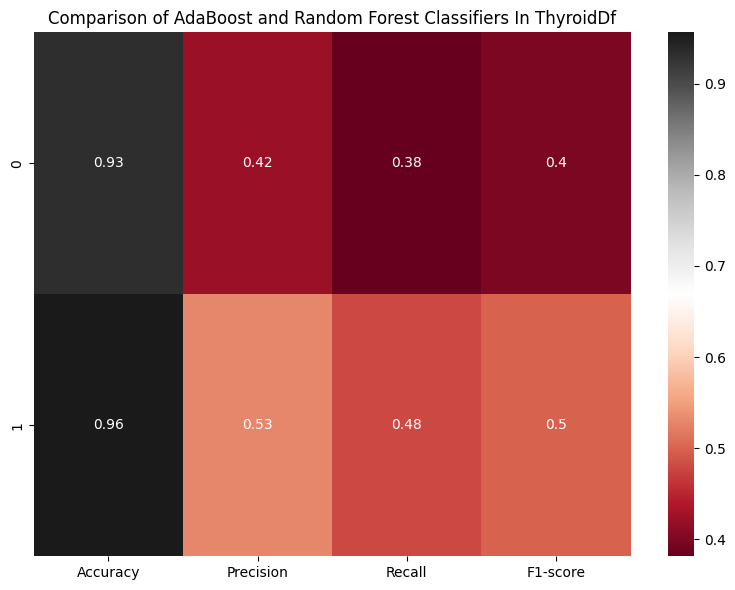

In [ ]:

# Create a heatmap
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
ax = sns.heatmap(comparison_df.iloc[:, 1:], cmap='RdGy', annot=True)  # Use seaborn heatmap
ax.set_title('Comparison of AdaBoost and Random Forest Classifiers In ThyroidDf')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


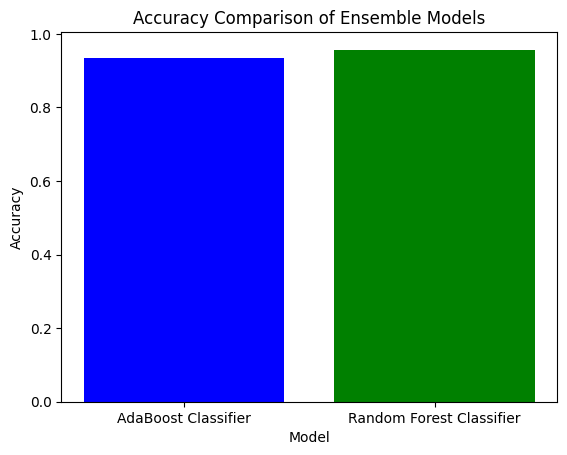

In [ ]:
# Bar chart for accuracy comparison
plt.bar(comparison_df['Model'], comparison_df['Accuracy'], color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Ensemble Models')
plt.show()


Heart

In [ ]:
# Create a dictionary to store the evaluation metrics
model_metrics = {
    'Model': ['AdaBoost Classifier', 'Random Forest Classifier'],
    'Accuracy': [ada_accuracyH, rf_accuracyH],
    'Precision': [ada_precisionH, rf_precisionH],
    'Recall': [ada_recallH, rf_recallH],
    'F1-score': [ada_f1H, rf_f1H]
}
comparison_dfH = pd.DataFrame(model_metrics)

# Print the comparison matrix
print("Comparison Matrix:")
print(comparison_dfH.to_string(index=False))


Comparison Matrix:
                   Model  Accuracy  Precision   Recall  F1-score
     AdaBoost Classifier  0.968992   0.967974 0.967974  0.967974
Random Forest Classifier  0.984496   0.987179 0.981132  0.983891


## Insights from the Thyroid Dataset

**AdaBoost Classifier:** The AdaBoost classifier has an accuracy of 93.4%, which is quite high, but its precision, recall, and F1-score are relatively low compared to its accuracy. This suggests that while the model is correct in a high percentage of cases, it is not as effective when it comes to the balance between precision and recall - it may be predicting one class very well but not the others, which is often the case with imbalanced datasets.

**Random Forest Classifier:** The Random Forest classifier outperforms AdaBoost in all metrics on the thyroid dataset, with an accuracy of 95.7%. This indicates that the Random Forest model is not only correct most of the time but also maintains a better balance between precision and recall. This could be due to the Random Forest's ability to handle the complex interactions and non-linear relationships between features more effectively.


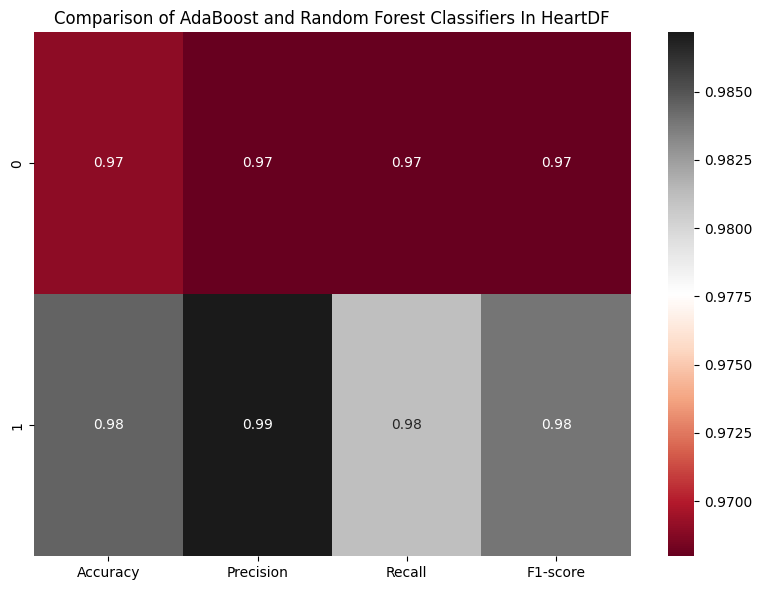

In [ ]:
# Create a heatmap
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
ax = sns.heatmap(comparison_dfH.iloc[:, 1:], cmap='RdGy', annot=True)  # Use seaborn heatmap
ax.set_title('Comparison of AdaBoost and Random Forest Classifiers In HeartDF')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


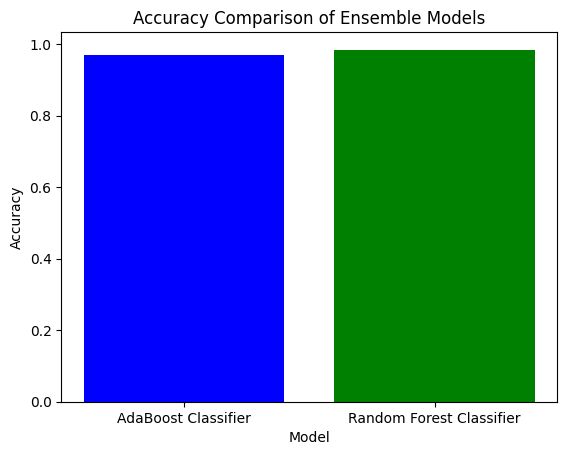

In [ ]:
# Bar chart for accuracy comparison
plt.bar(comparison_dfH['Model'], comparison_dfH['Accuracy'], color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Ensemble Models')
plt.show()



## Insights from the Heart Dataset

**AdaBoost Classifier:** On the heart dataset, the AdaBoost classifier shows excellent performance with an accuracy, precision, recall, and F1-score all above 96%. This suggests that the AdaBoost classifier is highly effective for this dataset, which might be less complex or less imbalanced than the thyroid dataset because it over fitted it preformed worse

**Random Forest Classifier:** The Random Forest classifier shows even better performance than AdaBoost on the heart dataset, with all metrics above 98%. This exceptional performance indicates that the Random Forest model is very well suited to this particular dataset, possibly due to its ability to capture more complex patterns without overfitting.


# Insights and Conclusions

## General Insights

**Strengths of AdaBoost:**

* AdaBoost can perform well when the dataset is less complex and when the decision boundaries between classes are more distinct, as seen with the heart dataset.
* It is often easier to implement and faster to train than a Random Forest, making it a good first choice for a baseline model.

**Weaknesses of AdaBoost:**

* AdaBoost can be sensitive to noisy data and outliers, which might explain the lower performance on the thyroid dataset.
* It may not perform as well when there are complex interactions between features.

**Strengths of Random Forest:**

* Random Forest is robust to noise and capable of handling complex interactions between features, which likely contributed to its strong performance on both datasets.
* It is less likely to overfit than other models, especially when the hyperparameters are tuned correctly.

**Weaknesses of Random Forest:**

* Random Forest models can be computationally intensive and may take longer to train, especially with a large number of trees or deep trees.
* They can also be less interpretable than simpler models, which can be a drawback in situations where understanding the model's decisions is important.


## Conclusion

The choice between AdaBoost and Random Forest can depend on the specific characteristics of the dataset at hand. For datasets with less noise and fewer complex interactions, AdaBoost may perform adequately and be more efficient. However, for datasets with more complexity and noise, Random Forest tends to be more reliable, albeit at the cost of computational resources and potentially interpretability. Hyperparameter tuning is crucial for both models to achieve optimal performance. In practice, it's often beneficial to try multiple models and compare their performance on the specific task to make an informed decision.